<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/4_1_LogisticRegression_LuckyBag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Logistic Regression*** \
is a classifier model while it study the linear equation for the model. \

***로지스틱 회귀***는 선형 방정식을 사용한 분류 알고리즘입니다. 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있습니다. \

**predict the classs with probability** \

z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f \


In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(pd.unique(fish['Species']))
fish.head()


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[0:5,:])
fish_target = fish['Species'].to_numpy()
print(fish_target)

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' '

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


***Multi-class Classification*** \
target data has more than 2 classes. \
For sklearn class, we can use words as targets not 0, 1 \
important) because numpy sort them alphabetically, the order of targets are different from the csv file.


In [ ]:
print(pd.unique(fish['Species']))
print(kn.classes_)
print(kn.predict(test_scaled[:5]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


***Predict_proba()*** only shows the probability of the nearest neighbors of 3 because we have set the n_kneighbors = 3

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4)) #1st #2nd #3rd #4th #5th ... probability

#Knegibhors input requires 2d array.
distances, indexes = kn.kneighbors(test_scaled[3:4]) #slicing notation : [start:end] or [start:end:step]
#slicing notation automatically bring 2d array

print(train_target[indexes])

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


z(the final answer) can be any number.
We want the probability 0 ~ 1 ( 0~100% ). \

huge negative number will be 0, than huge positive number will be 1. \

***Sigmoid Function or Logistic Function***

z가 무한하게 큰 음수를 0에 가까워지게하고, z가 무한하게 큰 양수가 될 떄는 1에 가까워지게 하는 함수! >>\
 z > 0 : positive class \


z < 0 : negative class


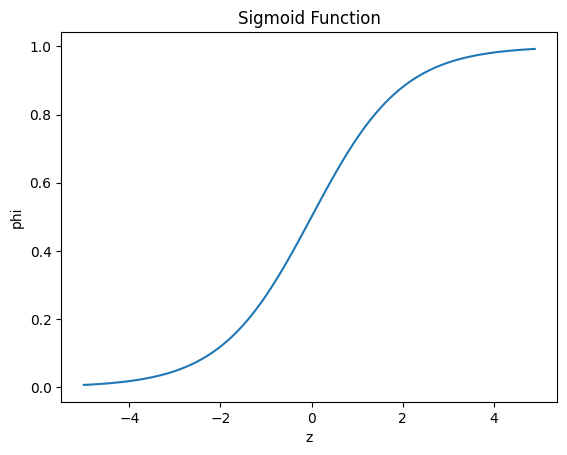

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.title('Sigmoid Function')
plt.show()

***Boolean Indexing*** \
Numpy array는 True, False 값을 전달하여 행을 선택할 수 있다.


In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


***이진 분류 & LogisticRegression*** \

positive class & negative class \
closer to 1 (bigger than 0.5) >> positive class > first class \
less than 0.5 >> negative class > second class

probability of second class : 1 - output (proba of first class)


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)
print(lr.coef_, lr.intercept_)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) # print first five z values
#we can get the probability by entering these values to sigmoid function
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


***Multiple Regression***

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000) #C is alpha of logistic of regression that regulate the strength of regularization
#as C gets bigger and bigger, the regularization get weaker (opposite of alpha)
#max_iter >> maximum computing
#default is 100 for max_iter

lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape) # (7, 5) >> computing 7 z, 5 coefficients
# (7,) >> computing 7 z


0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)


We use ***softmax function*** to compute the probability of ***multiple classes*** \

from z1 to z7, e_sum = e^(z1) + e^(z2) + ... \

s1 = e^(z1)/e_sum.        \s1 + s2 + s3 + s4 + ... = 1

We use ***sigmoid function*** to comput the probability of ***binary classes***

1/(1+e^(-z))

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

from scipy.special import softmax
proba = softmax(decision, axis=1) #axis = 1로 지정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산한다.
#만약 axis parameter를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산.

print(np.round(proba, decimals=3))


[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
